In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline

from sklearn.metrics import r2_score

###############################################################################
# Lasso and Linear
from sklearn.linear_model import Lasso,LinearRegression
from sklearn.metrics import mean_squared_error

import scipy.optimize as sciop

In [4]:
!make fortran

clear
f2py -c -m irreverisble irreverisble.f90
running build
running config_cc
unifing config_cc, config, build_clib, build_ext, build commands --compiler options
running config_fc
unifing config_fc, config, build_clib, build_ext, build commands --fcompiler options
running build_src
build_src
building extension "irreverisble" sources
f2py options: []
f2py:> /tmp/tmpP1w1xs/src.linux-x86_64-2.7/irreverisblemodule.c
creating /tmp/tmpP1w1xs/src.linux-x86_64-2.7
Reading fortran codes...
	Reading file 'irreverisble.f90' (format:free)
Post-processing...
	Block: irreverisble
			Block: mechanics
In: :irreverisble:irreverisble.f90:mechanics
get_parameters: got "name 'acos' is not defined" on 'acos(-1.0e0)'
Post-processing (stage 2)...
Building modules...
	Building module "irreverisble"...
		Constructing wrapper function "mechanics"...
		  stress_strain,wtn = mechanics(p_stress,ss_stress,tsam,m_para,[samples])
	Wrote C/API module "irreverisble" to file "/tmp/tmpP1w1xs/src.linux-x86_64-2.7/irrever

In [5]:
import irreverisble

In [6]:
global exp
exp = []                           # ***** target 
exp = np.loadtxt('ref/HSRS/22')

In [7]:
def plotSingle2D(comp,xtitle,ytitle,xscale,yscale):

        fig, ax = plt.subplots(figsize=(9,6))

        ax.plot(comp[:,0],comp[:,1],lw=3)
        ax.plot(exp[:,0], exp[:,1],'o',zorder=5,markevery=5)

        ax.set_xlabel(xtitle, fontsize=35, labelpad=15)
        ax.set_ylabel(ytitle, fontsize=35, labelpad=15)
        ax.tick_params(axis='x', labelsize=25, pad = 10)
        ax.tick_params(axis='y', labelsize=25, pad = 10)

        ax.set_xscale(xscale, nonposx='clip')
        ax.set_yscale(yscale, nonposx='clip')
        
        ax.set_xlim(0,exp[-1,0]+1)

        ax.grid(True)
        fig.tight_layout()
        plt.show()

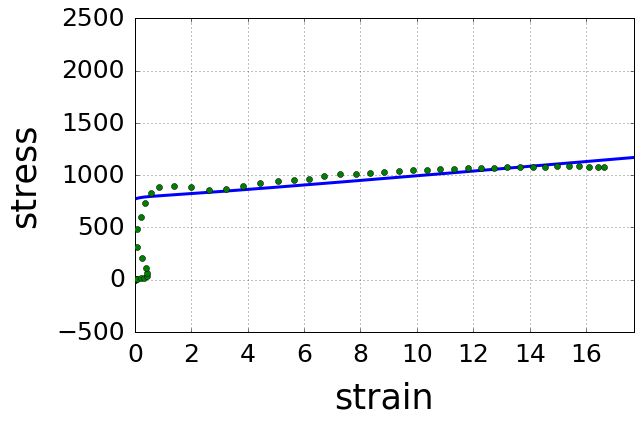

In [8]:
# --------------- material properties
T_service = 22. + 273.
prec_stress = 0
SS_stress = 750

# -------------- number samples, =1 in this case
no_samples = 1
# ============================== objective
# optimize these two parameters (model_parameters)
# to minimize the error between [exp] and [stress_strain]
# ==============================
model_parameters = (-100, 1)


# the function, irreverisble.mechanics, is used to calculate the stress-strain curve in plastic deforamtion region 
# the outputs are 2D list (stress-strain, stress_strain) and 1 parameter (work to necking, WTN)
strain_stress, WTN = irreverisble.mechanics(prec_stress,SS_stress,T_service,model_parameters,no_samples)
strain_stress = np.array(np.trim_zeros(strain_stress)).reshape(-1,2)

plotSingle2D(strain_stress,'strain','stress','linear','linear')

In [9]:
def mcfunc(model_parameters):
    T_service = 22. + 273.
    prec_stress = 0
    SS_stress = 750
    
    strain_stress, WTN = irreverisble.mechanics(prec_stress,SS_stress,T_service,model_parameters,no_samples)
    strain_stress = np.array(np.trim_zeros(strain_stress)).reshape(-1,2)

    #----------------------------
    cal_val = []
    for iexp in range(len(exp[:,0])):
        for ical in range(len(strain_stress[:,0]-1)):
            if(exp[iexp,0]>strain_stress[ical,0] and exp[iexp,0]<strain_stress[ical+1,0]):
                cal_val.append([strain_stress[ical,0],strain_stress[ical,1]])
                break

    cal_val = np.asarray(cal_val)
    
    #print cal_val
    #----------------------------
    
    return strain_stress

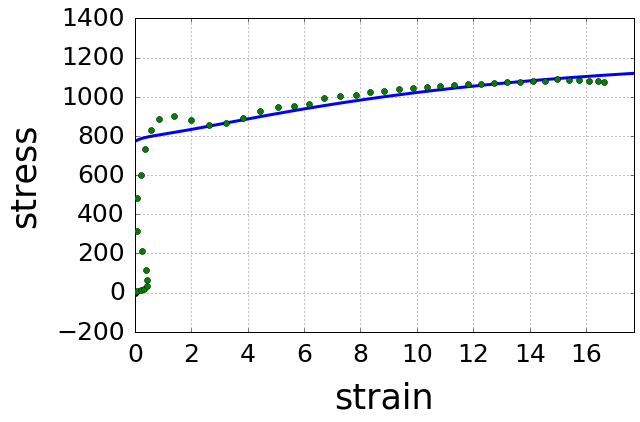

In [10]:
strain_stress = mcfunc((-30, 0.823))

plotSingle2D(strain_stress,'strain','stress','linear','linear')